In [45]:
import pandas as pd

In [46]:
df=pd.read_csv('PowerPlant.csv')

In [47]:
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [48]:
df.head(10)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
5,13.97,39.16,1016.05,84.60,470.96
6,22.10,71.29,1008.20,75.38,442.35
7,14.47,41.76,1021.98,78.41,464.00
8,31.25,69.51,1010.25,36.83,428.77
9,6.77,38.18,1017.80,81.13,484.31


In [49]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [51]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [52]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [53]:
X=df.drop(labels='PE',axis=1)
Y=df[['PE']]

In [54]:
# preprocessing

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
ss=StandardScaler()

In [57]:
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [58]:
X

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427
...,...,...,...,...
9563,-0.608049,-0.423838,-0.245699,-0.025958
9564,1.846298,1.860689,-0.498289,-0.930783
9565,-0.491303,-0.862958,0.158445,0.366521
9566,-0.268547,0.437876,0.896008,1.461763


In [59]:
# chweck outleirs
out=[]
for i in X.columns:
    ol=X[(X[i]>3)|(X[i]<-3)].index
    out.extend(ol)


In [60]:
out

[30,
 413,
 1117,
 1236,
 1539,
 1564,
 1638,
 1777,
 1837,
 2043,
 2058,
 2273,
 2381,
 2401,
 2636,
 3046,
 3424,
 3999,
 4010,
 4110,
 4132,
 4360,
 4367,
 4428,
 4552,
 4569,
 4813,
 5074,
 5710,
 6003,
 6139,
 6592,
 6720,
 6905,
 6907,
 7101,
 7103,
 7170,
 7243,
 7329,
 7572,
 7625,
 7944,
 8041,
 8102,
 8228,
 8542,
 8644,
 8748,
 8762,
 9232,
 1836,
 3549,
 3909,
 4688,
 5787,
 6302,
 8959]

In [61]:
# train test split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [64]:
xtrain.shape

(7654, 4)

In [65]:
xtest.shape

(1914, 4)

In [66]:
# build the neural netwrok

In [67]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [68]:
# initialize the model
model=Sequential()

# add your layers
model.add(Input(shape=(xtrain.shape[1])))

# add hidden layers
model.add(Dense(units=64,activation='relu')) # hideen maimhamesha reluhoga
model.add(Dense(units=32,activation='relu'))

# add output layer
model.add(Dense(units=1,activation='linear'))

In [69]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [70]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=60) # one backward plus one forward = 1 epochs

Epoch 1/60
192/192 [==============================] - 2s 4ms/step - loss: 184235.5625 - mae: 427.7016 - val_loss: 125297.2969 - val_mae: 351.6440
Epoch 2/60
192/192 [==============================] - 1s 3ms/step - loss: 50785.6133 - mae: 198.2892 - val_loss: 18423.8828 - val_mae: 116.1525
Epoch 3/60
192/192 [==============================] - 1s 3ms/step - loss: 13059.6572 - mae: 96.3410 - val_loss: 8856.7900 - val_mae: 79.8770
Epoch 4/60
192/192 [==============================] - 1s 3ms/step - loss: 5557.3687 - mae: 61.8406 - val_loss: 3366.4910 - val_mae: 48.1819
Epoch 5/60
192/192 [==============================] - 1s 3ms/step - loss: 2058.3267 - mae: 36.5791 - val_loss: 1331.8040 - val_mae: 29.3681
Epoch 6/60
192/192 [==============================] - 1s 3ms/step - loss: 929.9399 - mae: 24.0479 - val_loss: 700.5933 - val_mae: 20.9359
Epoch 7/60
192/192 [==============================] - 1s 3ms/step - loss: 540.3237 - mae: 18.1687 - val_loss: 439.7839 - val_mae: 16.2576
Epoch 8/60
19

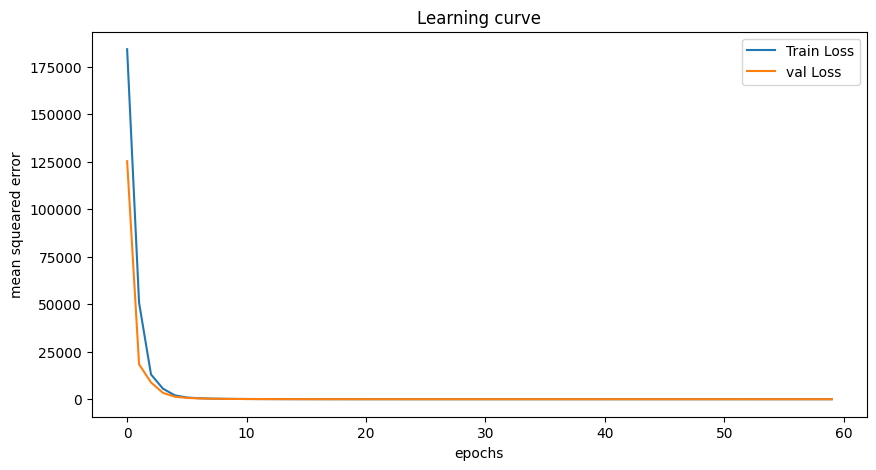

In [71]:
# plot the learning curve

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='val Loss')
plt.xlabel('epochs')
plt.ylabel('mean squeared error')
plt.legend()
plt.title('Learning curve')
plt.show()

In [72]:
# Evaluate model

In [73]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 0s 4ms/step - loss: 20.8593 - mae: 3.4134


[20.859291076660156, 3.4134066104888916]

In [74]:
model.evaluate(xtrain,ytrain)

240/240 [==============================] - 1s 3ms/step - loss: 18.7016 - mae: 3.3714


[18.701597213745117, 3.3714046478271484]

In [75]:
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [76]:
ytrain.head()

,PE
1348,453.27
8938,430.67
3568,431.77
6479,441.07
2466,438.89


In [77]:
tr_pred[:5]

array([[446.20294],
       [431.7613 ],
       [431.29553],
       [442.37296],
       [432.55896]], dtype=float32)

In [78]:
from sklearn.metrics import mean_absolute_error,r2_score

In [79]:
tr_score=r2_score(ytrain,tr_pred)
ts_score=r2_score(ytest,ts_pred)

In [80]:
print(tr_score)
print(ts_score)

0.9358965839855317
0.9278158734310367
